# DATA ANALYSIS OF 50 STARTUPS AND FINDING OUT THE VARIABLES OF THAT ARE THE MOST IMPORTANT FOR PROFITS

# 1.Preprocessing of Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score
import seaborn as sns

In [22]:
dt=pd.read_csv(r"C:\Users\KIIT\OneDrive\P14-Part2-Regression\Section 7 - Multiple Linear Regression\Python\50_Startups.csv")
dt.head(20)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Avoiding Dummy Trap

From the above dataset it is clear that there is one cateogorical data i.e State.So we have to drop the categorical variable and convert into a numerical variable(having binary values) and drop one of its values to avoid dummy trap

In [3]:

status=pd.get_dummies(dt['State'])
status=pd.get_dummies(dt['State'], drop_first = True)
dt=pd.concat([dt,status],axis=1)
dt=dt.drop(['State'],axis=1)



We will now check the correlation between the variables using heatmap illustration by seaborn library

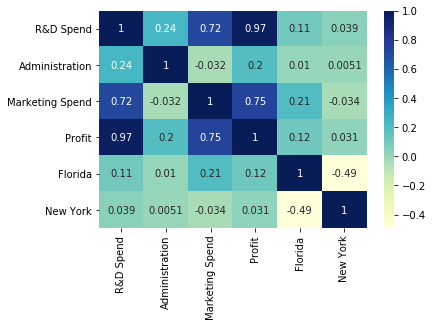

In [4]:
sns.heatmap(dt.corr(), annot = True, cmap="YlGnBu")

# 2. Model Building

In [5]:
x=dt[['Marketing Spend','R&D Spend','Administration','New York','Florida']]  
y=dt['Profit']



In [6]:
dt_x=sm.add_constant(x)
lr=sm.OLS(y,dt_x).fit()

# 3. MODEL PREDICTION

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dt_x,y,test_size=0.2,random_state=0)




In [8]:
y_p=lr.predict(x_test)

In [9]:
df=pd.DataFrame({'Predicted Profit of the Startup(in rupees)':y_p})
df.sort_values('Predicted Profit of the Startup(in rupees)')

,Predicted Profit of the Startup(in rupees)
38,69606.521607
41,74956.311048
31,97617.296321
28,101818.587387
27,114279.804028
22,114833.305137
11,135528.600783
10,135664.642592
4,172277.133818
2,182276.186735


In [10]:
r2_score(y_test,y_p)

0.9569149250741502

# 4.Analyzing the data from the above built model

In [11]:

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 02 Sep 2020   Prob (F-statistic):           1.34e-27
Time:                        17:06:40   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
Marketing Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
R&D Spend           0.8060      0.046     17.369      0.000       0.712       0.900
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
New York          -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
Florida           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can notice from the above summary that the P-values of variable 'New York' and 'Florida' are very high and therefore gives us the conclusion that they are highly significant on the profits.Therefore we are dropping them.

Building another model from the rest variables.

In [12]:

x=dt[['Marketing Spend','R&D Spend','Administration']]  
y=dt['Profit']

lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 02 Sep 2020   Prob (F-statistic):           1.34e-27
Time:                        17:06:40   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
Marketing Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
R&D Spend           0.8060      0.046     17.369      0.000       0.712       0.900
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
New York          -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
Florida           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dt_x,y,test_size=0.2,random_state=0)


In [14]:
dt_x=sm.add_constant(x)
lr=sm.OLS(y_train,x_train).fit()

In [15]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     129.7
Date:                Wed, 02 Sep 2020   Prob (F-statistic):           3.91e-21
Time:                        17:06:40   Log-Likelihood:                -421.10
No. Observations:                  40   AIC:                             854.2
Df Residuals:                      34   BIC:                             864.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.255e+04   8358.538      5.091      0.000    2.56e+04    5.95e+04
Marketing Spend     0.0366      0.019      1.884      0.068      -0.003       0.076
R&D Spend           0.7735      0.055     14.025      0.000       0.661       0.886
Administration      0.0329      0.066      0.495      0.624      -0.102       0.168
New York          699.3691   3661.563      0.191      0.850   -6741.822    8140.560
Florida          -959.2842   4038.108     -0.238      0.814   -9165.706    7247.138
==============================================================================
Omnibus:                       15.823   Durbin-Watson:                   2.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.231
Skew:                          -1.094   Prob(JB):                     9.03e-06
Kurtosis:                       6.025   Cond. No.                     1.49e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above statistical summary we see that the R sqaure value is almost equal to one.But the P-value of Administraton variable is 0.60 which is very high.So this variable is insignificant and we can drop it.

In [16]:
x=dt[['Marketing Spend','R&D Spend']]  
y=dt['Profit']
dt_x=sm.add_constant(x)
lr=sm.OLS(y,dt_x).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 02 Sep 2020   Prob (F-statistic):           2.16e-31
Time:                        17:06:40   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
Marketing Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
R&D Spend           0.7966      0.041     19.266      0.000       0.713       0.880
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After dropping the insignificant variable we see that the 2nd model generated still has high r-sqaure value which is close to 1

Also the P-values of the variables-Marketing Spend and R&D spend have very low P-value(0&0.06) making them much more significant.

Checking VIF values to find multicollinearity in the model.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Marketing Spend,7.16
1,R&D Spend,7.16


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dt_x,y,test_size=0.2,random_state=0)



In [19]:
y_p=lr.predict(x_test)

In [20]:
df=pd.DataFrame({'Predicted Profit of the Startup(in rupees)':y_p})
df.sort_values('Predicted Profit of the Startup(in rupees)')

,Predicted Profit of the Startup(in rupees)
38,68631.318323
41,74113.888705
31,98314.548854
28,103125.012760
27,114978.605150
22,114990.384639
11,134638.870075
10,135011.914724
4,171127.623218
2,181405.378097


In [21]:
r2_score(y_test,y_p)

0.9509473296144155

# 5. Conclusions

VIF values of R&D Spend and Marketing Spend are greater than 5 which is a sign of potential multicollinearity.

The conclusion is that the company should focus more on investing in Marketing and R&D in the given three investments.